In [94]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt


X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_clusters_per_class=1,n_classes=2,random_state=42,class_sep=10)

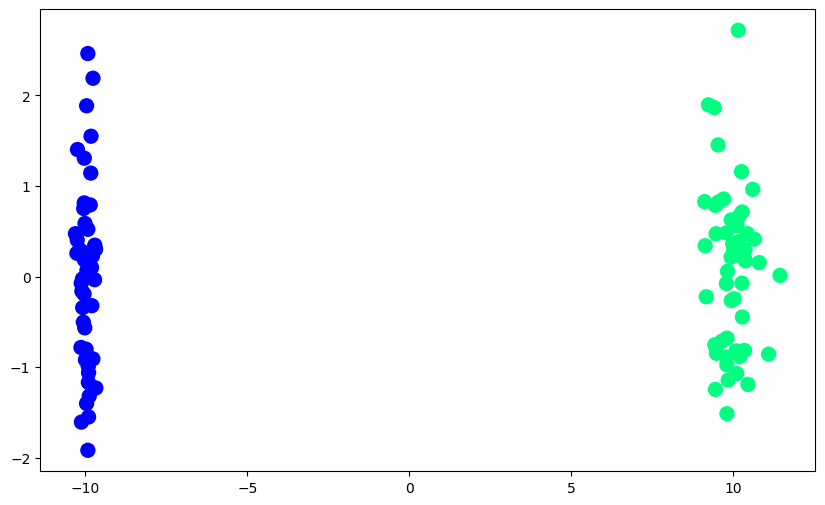

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [96]:
def perceptron(X,y):

    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.1

    for i in range(1000):
        j=np.random.randint(X.shape[0])
        y_hat=step(np.dot(X[j],weights))
        weights=weights+lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]


In [97]:
def step(z):
    return 1 if z>0 else 0

In [98]:

intercept_,coef_ = perceptron(X,y)

In [99]:
intercept_,coef_

(np.float64(1.0), array([1., 1.]))

In [100]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [101]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

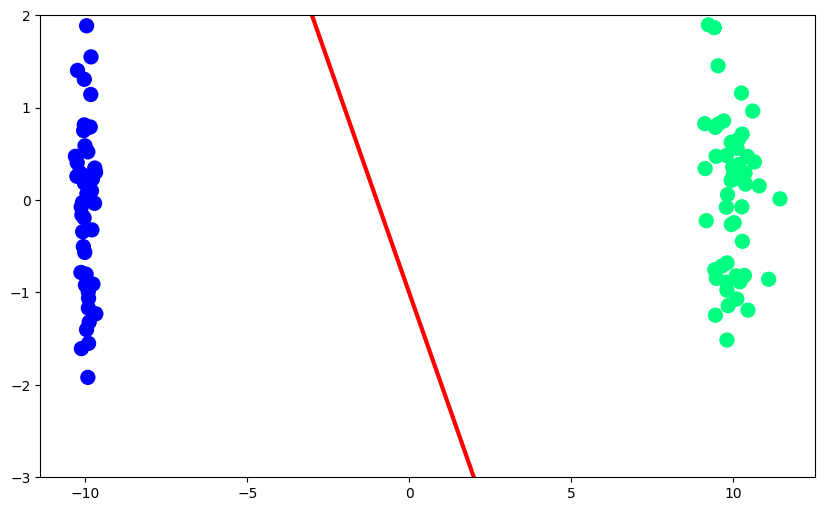

In [102]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [103]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [104]:
m,b = perceptron(X,y)
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

c:\Users\ayush\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


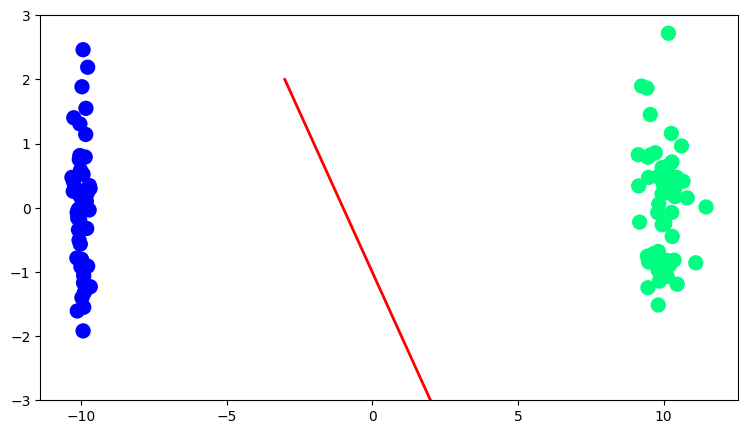

In [105]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

plt.show(block=True)

In [106]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [107]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [108]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

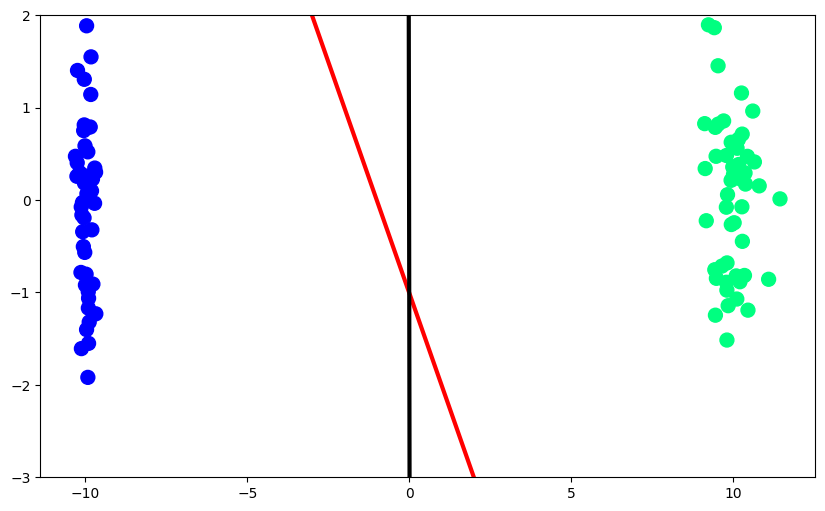

In [109]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.show()

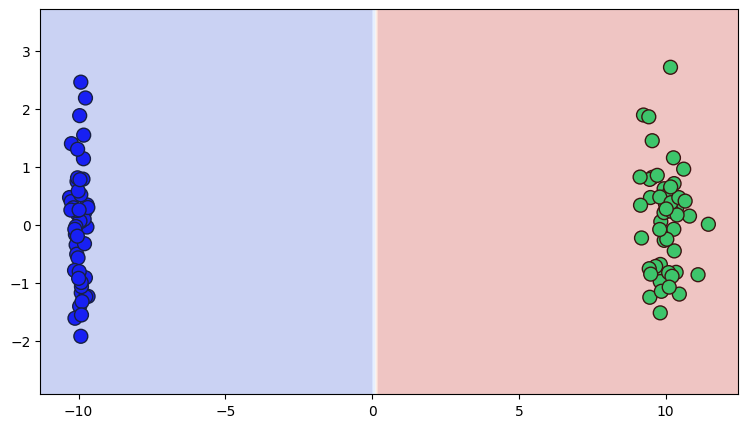

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


# Train Logistic Regression Model
lor = LogisticRegression()
lor.fit(X, y)

# Scatter plot of data points
plt.figure(figsize=(9, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100, edgecolors="k")

# Decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Contour plot to show decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
# 